<h3 align="center"><font color=green><font size = 20>World Happiness Report 2019</h3> </font>

> ### <font color = indigo>1. Project Summary & Package Installation Instructions  
> ### <font color = indigo>2. Data Cleaning   
> ### <font color = indigo>3. Life Ladder World Distribution 
> ### <font color = indigo>4. Best Life-Ladder-Predictors Selection (Overall Dataset)
> ### <font color = indigo>5. Best Life-Ladder-Predictors Selection (Yearly Dataset)
> ### <font color = indigo>6. Best Life-Ladder-Predictors for Happier and Less Happy Countries
> ### <font color = indigo>7. Forecasting the Predictor Importance in 2019 (Time Series Regression)
> ### <font color = indigo>8. Forecasting the Happiest Countries in 2019, and Singapore's Rank (Time Series Regression)
> ### <font color = indigo>9. Credits

### <font color = green> 1. Project Summary & Package Installation Instructions 
> **Please install the following modules using Anaconda Prompt                         
(a) pip install pycountry                                                                                                    
(b) conda -c konstantinstadler country_converter <br>
(c) pip install cufflinks** 

### <font color = green> 2. Data Cleaning using Linear Interpolation

In [1]:
# Import basic functions
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import interpolate
from scipy import interpolate
# Import the dataset
worldhappiness = pd.read_csv('World Happiness Report 2019.csv')

# Store the required dataframes (dropping the columns with more than 50% null values)
main = pd.DataFrame(worldhappiness[["Country name", "Year", "Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect", "Confidence in national government", "Democratic Quality", "Delivery Quality"]])

# Interpolate to fill in missing values
#np.interp(x, xp, fp, left=None, right=None, period=None)

df = {}
predictors = ["Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect", "Confidence in national government", "Democratic Quality", "Delivery Quality"]
report = pd.DataFrame()

for country in main["Country name"].unique():
    df[country] = pd.DataFrame(main[main["Country name"]==country])
    for item in predictors:
        df[country][item].interpolate(method='linear', limit_direction='both', limit=10, inplace=True)
    

for country in df:
    report = report.append(df[country])
    

report = report.dropna()

report.isnull().sum()

report_sub = report

report = report.drop(["Country name", "Year"], axis=1)




### <font color = green> 3. Visualising the Life Ladder across countries

In [2]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools


#Setting user API permission for Plotly
plotly.tools.set_credentials_file(username='DSAI_LAB_PROJ', api_key='pHvJS3Xxw8rvKAEd1usj')

# We first import all the necessary modules to be used in our project
import country_converter as coco
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycountry


# 2018 Data is extracted
year18 = pd.DataFrame(report_sub[report_sub["Year"]==2018])

#Conversion of country names to ISO3 standard
country_names = list(year18["Country name"])
iso3_codes = coco.convert(names = country_names, to='ISO3')

#Extraction of our 2 main variables : Country Name and Life Ladder
main_report_sub = year18[["Country name", "Life Ladder"]]

import warnings
warnings.filterwarnings('ignore')

#Visualisation of the World Map
data = [go.Choropleth(
    locations = pd.DataFrame(iso3_codes),
    z = year18['Life Ladder'],
    text = year18['Country name'],        
    colorscale = [
        [0, "rgb(0, 102, 51)"],
        [0.35, "rgb(0, 153, 76)"],
        [0.5, "rgb(0, 204, 102)"],
        [0.6, "rgb(0, 255, 128)"],
        [0.7, "rgb(51, 255, 123)"],
        [1, "rgb(102, 255, 178)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(0,0,0)',
            width = 0.7
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = '2018 Happiness Index<br>(Rated out of 10)'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'World Happiness Index (2018)'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

# Displaying the Map in Jupyter Notebook
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-world-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~DSAI_LAB_PROJ/0 or inside your plot.ly account where it is named 'd3-world-map'


### <font color = green>3. Exploratory Data Analysis of our 11 Predictors

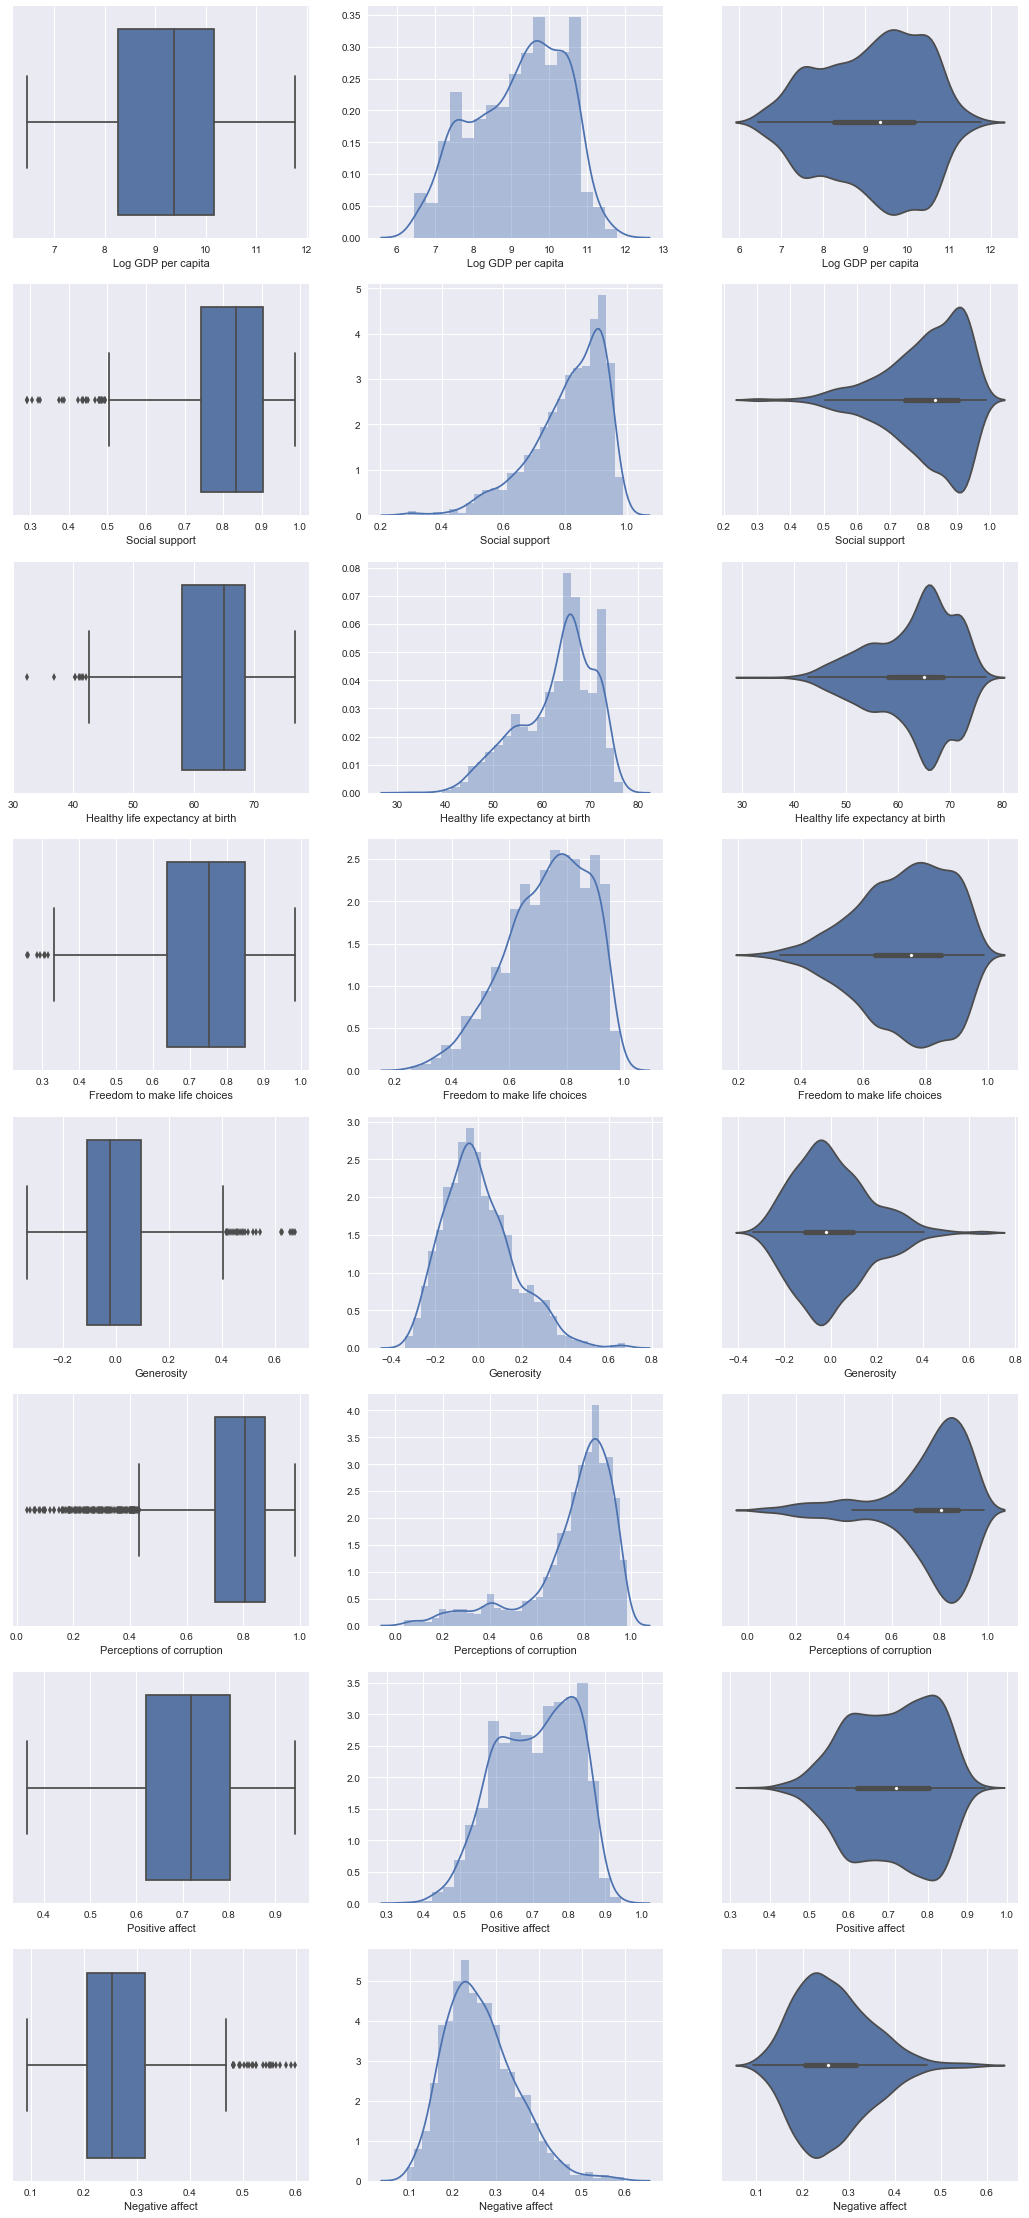

In [3]:
report.sort_values(by = ["Life Ladder"], ascending = True)
report.describe()

def cat(x):
    if x < report["Life Ladder"].mean():
        return "Low"
    return "High"

report["Life Ladder"] = report["Life Ladder"].apply(lambda x: cat(x))

# Extract Response and Predictors
y = pd.DataFrame(report["Life Ladder"])
X = pd.DataFrame(report[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect"]])


# Draw the distributions of all Predictors
f, axes = plt.subplots(8, 3, figsize=(18, 40))

count = 0
for var in X:
    sb.boxplot(X[var], orient = "h", ax = axes[count,0])
    sb.distplot(X[var], ax = axes[count,1])
    sb.violinplot(X[var], ax = axes[count,2])
    count += 1



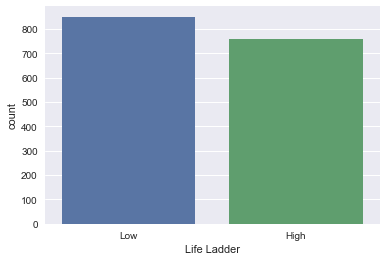

In [4]:
sb.countplot(report["Life Ladder"])

### <font color = green> 4A. Visualising the relationship between Life Ladder and our 11 Predictors

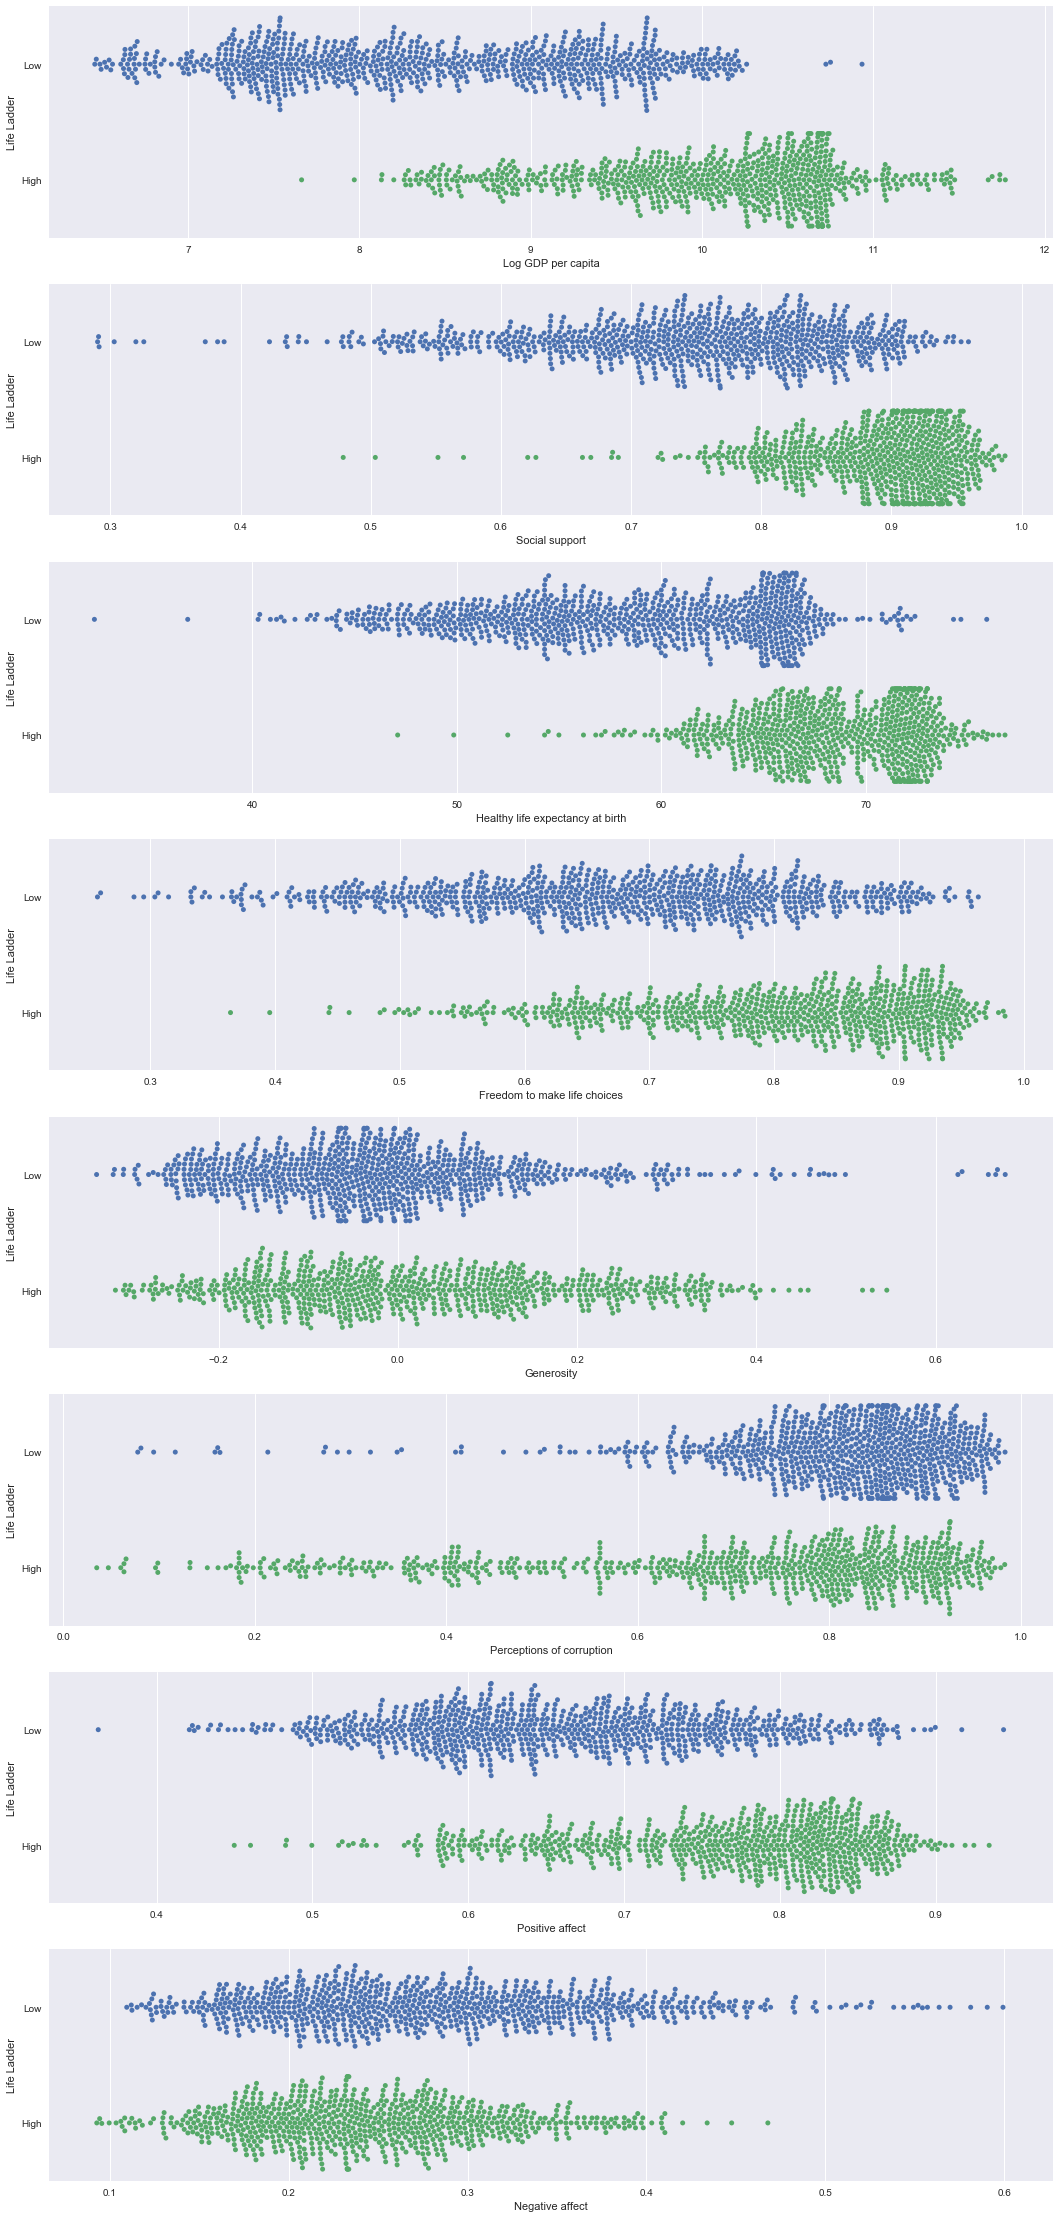

In [5]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y, X], axis = 1, join_axes = [y.index])

f, axes = plt.subplots(8, 1, figsize=(18, 40))

count = 0
for var in X:
    sb.swarmplot(x = var, y = "Life Ladder", data = trainDF, orient = "h", ax = axes[count])
    count += 1

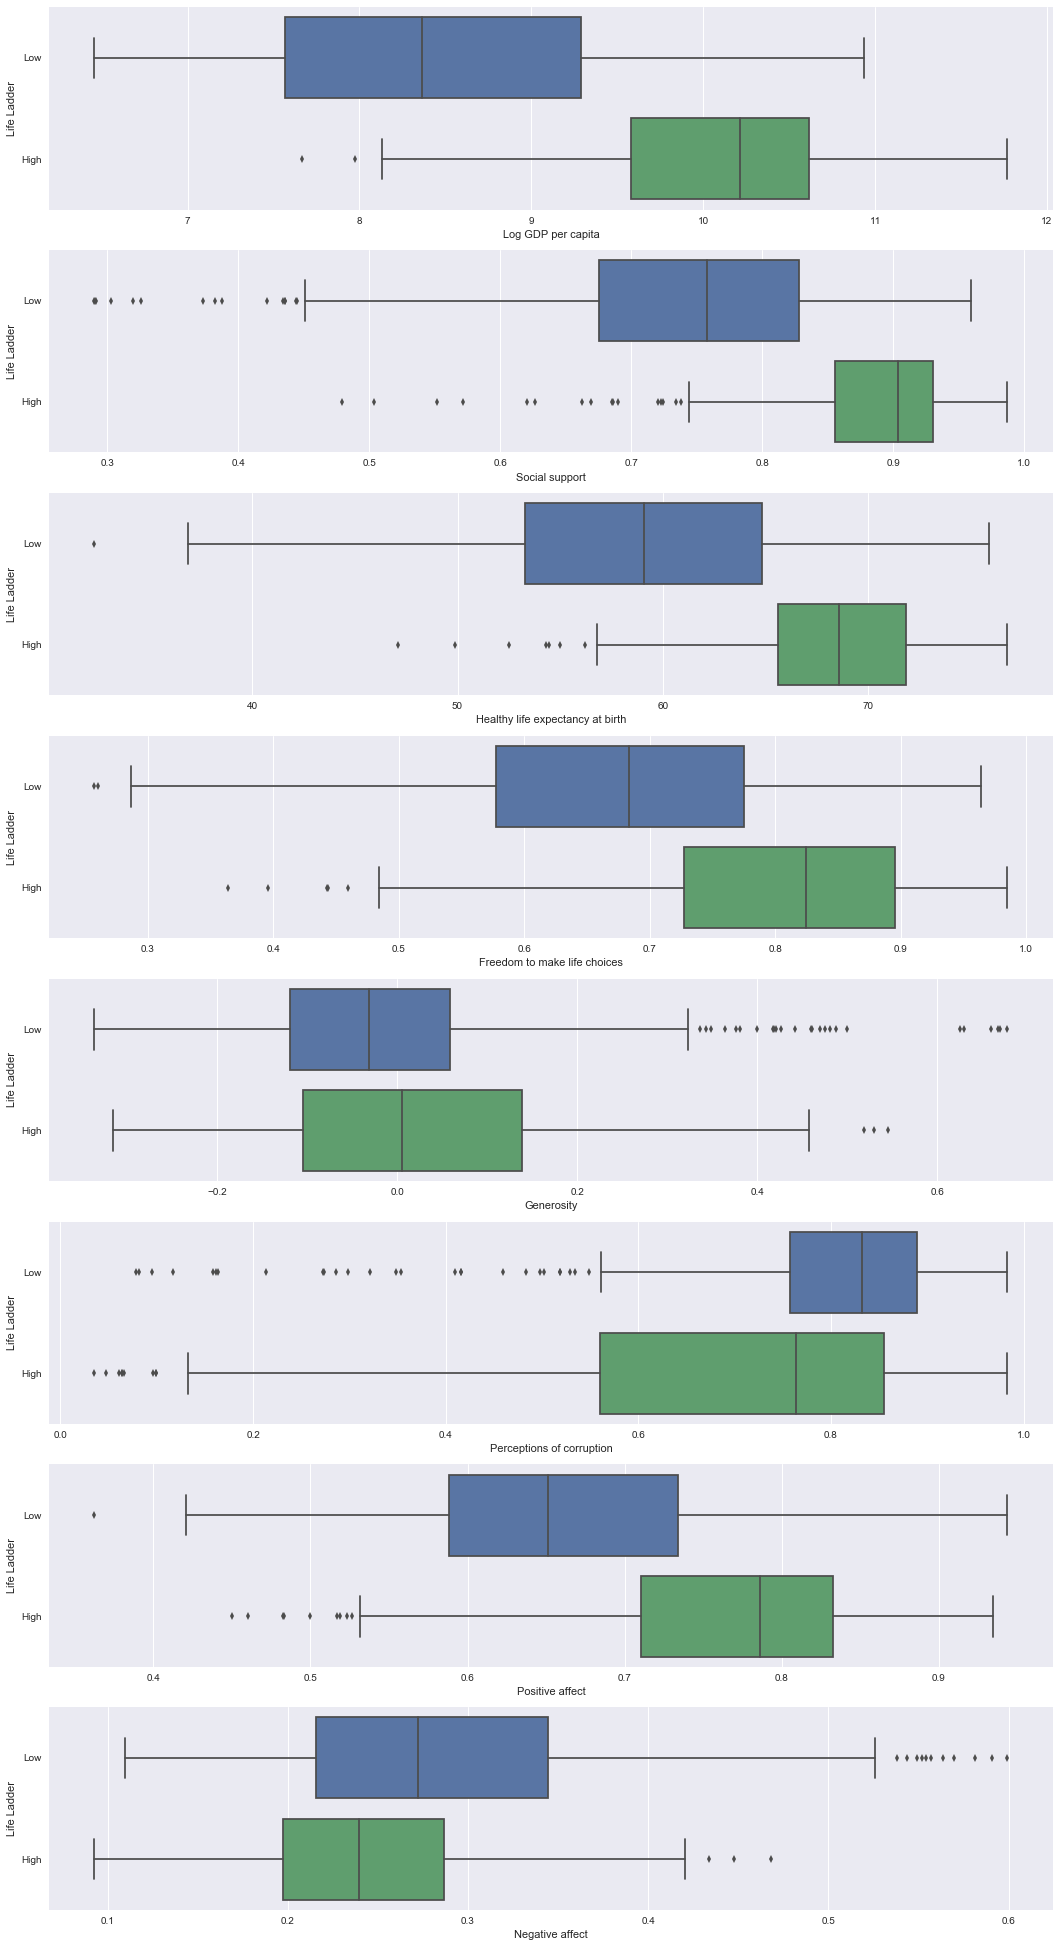

In [6]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y, X], axis = 1, join_axes = [y.index])

f, axes = plt.subplots(8, 1, figsize=(18, 35))

count = 0
for var in X:
    sb.boxplot(x = var, y = "Life Ladder", data = trainDF, orient = "h", ax = axes[count])
    count += 1

### <font color = green> 4B. Best Life-Ladder-Predictors (Yearly Dataset)

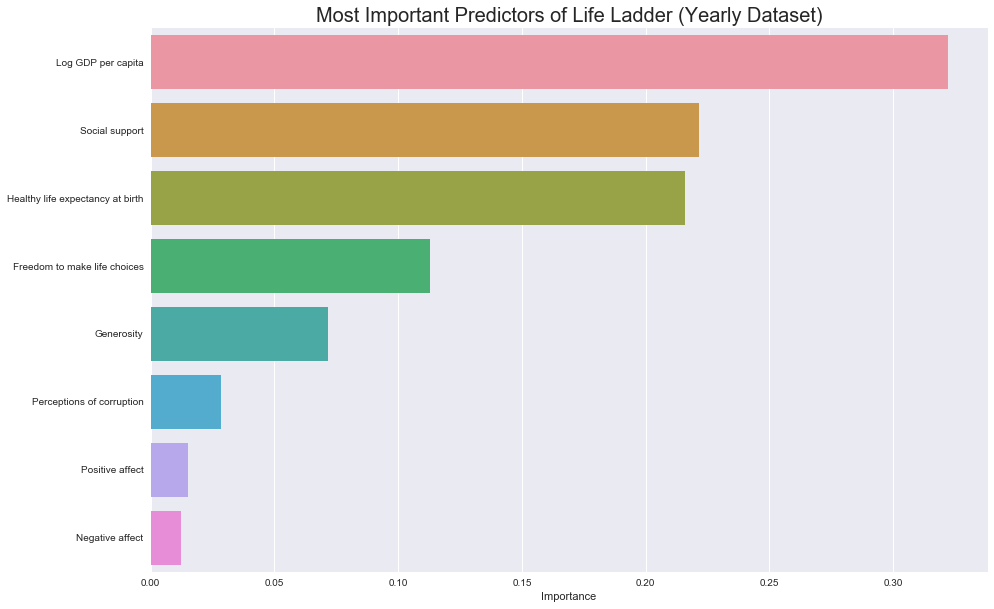

In [7]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X, y)

feature_importances = pd.DataFrame(rforest.feature_importances_,
                                      index = X.columns,
                                      columns=['Importance']).sort_values('Importance', ascending=False)

plt.figure(figsize=(15, 10))
plt.title("Most Important Predictors of Life Ladder (Yearly Dataset)", {'fontsize': 20})
sb.barplot(y = X.columns,x = 'Importance', data = feature_importances, orient = "h")

### <font color = green> 5A. Best Life-Ladder-Predictors Selection (Yearly Dataset)

In [8]:
# We now extract each year's data and store in their individual dataframe

year05 = pd.DataFrame(report_sub[report_sub["Year"]==2005])
year06 = pd.DataFrame(report_sub[report_sub["Year"]==2006])
year07 = pd.DataFrame(report_sub[report_sub["Year"]==2007])
year08 = pd.DataFrame(report_sub[report_sub["Year"]==2008])
year09 = pd.DataFrame(report_sub[report_sub["Year"]==2009])
year10 = pd.DataFrame(report_sub[report_sub["Year"]==2010])
year11 = pd.DataFrame(report_sub[report_sub["Year"]==2011])
year12 = pd.DataFrame(report_sub[report_sub["Year"]==2012])
year13 = pd.DataFrame(report_sub[report_sub["Year"]==2013])
year14 = pd.DataFrame(report_sub[report_sub["Year"]==2014])
year15 = pd.DataFrame(report_sub[report_sub["Year"]==2015])
year16 = pd.DataFrame(report_sub[report_sub["Year"]==2016])
year17 = pd.DataFrame(report_sub[report_sub["Year"]==2017])
year18 = pd.DataFrame(report_sub[report_sub["Year"]==2018])


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

###############################################2005###################################################

y05 = pd.DataFrame(year05['Life Ladder'])
X05 = pd.DataFrame(year05[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])


# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train_05, X_test_05, y_train_05, y_test_05 = train_test_split(X05, y05, test_size = 0.25)

# Create a Gaussian Classifier
clf_05 = RandomForestRegressor(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_05.fit(X_train_05,y_train_05)

# Determining the goodness-of-fit of our Random Forest Regression Model
r_squared_05 = clf_05.score(X_test_05, y_test_05)

#Setting a feature importances dataframe for Year 2005
feature_importances_05 = pd.DataFrame(clf_05.feature_importances_,
                                      index = X_train_05.columns,
                                      columns=['Importance (2005)']).sort_values('Importance (2005)', ascending=False)


###############################################2006###################################################

y06 = pd.DataFrame(year06['Life Ladder'])
X06 = pd.DataFrame(year06[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_06, X_test_06, y_train_06, y_test_06 = train_test_split(X06, y06, test_size = 0.25)
clf_06 = RandomForestRegressor(n_estimators=100)
clf_06.fit(X_train_06,y_train_06)
r_squared_06 = clf_06.score(X_test_06, y_test_06)
feature_importances_06 = pd.DataFrame(clf_06.feature_importances_,
                                   index = X_train_06.columns,
                                    columns=['Importance (2006)']).sort_values('Importance (2006)', ascending=False)


###############################################2007###################################################

y07 = pd.DataFrame(year07['Life Ladder'])
X07 = pd.DataFrame(year07[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_07, X_test_07, y_train_07, y_test_07 = train_test_split(X07, y07, test_size = 0.25)
clf_07 = RandomForestRegressor(n_estimators=100)
clf_07.fit(X_train_07,y_train_07)
r_squared_07 = clf_07.score(X_test_07, y_test_07)
feature_importances_07 = pd.DataFrame(clf_07.feature_importances_,
                                   index = X_train_07.columns,
                                    columns=['Importance (2007)']).sort_values('Importance (2007)', ascending=False)


###############################################2008###################################################

y08 = pd.DataFrame(year08['Life Ladder'])
X08 = pd.DataFrame(year08[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_08, X_test_08, y_train_08, y_test_08 = train_test_split(X08, y08, test_size = 0.25)
clf_08 = RandomForestRegressor(n_estimators=100)
clf_08.fit(X_train_08,y_train_08)
r_squared_08 = clf_08.score(X_test_08, y_test_08)
feature_importances_08 = pd.DataFrame(clf_08.feature_importances_,
                                   index = X_train_08.columns,
                                    columns=['Importance (2008)']).sort_values('Importance (2008)', ascending=False)


###############################################2009###################################################

y09 = pd.DataFrame(year09['Life Ladder'])
X09 = pd.DataFrame(year09[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_09, X_test_09, y_train_09, y_test_09 = train_test_split(X09, y09, test_size = 0.25)
clf_09 = RandomForestRegressor(n_estimators=100)
clf_09.fit(X_train_09,y_train_09)
r_squared_09 = clf_09.score(X_test_09, y_test_09)
feature_importances_09 = pd.DataFrame(clf_09.feature_importances_,
                                   index = X_train_09.columns,
                                    columns=['Importance (2009)']).sort_values('Importance (2009)', ascending=False)


###############################################2010###################################################

y10 = pd.DataFrame(year10['Life Ladder'])
X10 = pd.DataFrame(year10[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X10, y10, test_size = 0.25)
clf_10 = RandomForestRegressor(n_estimators=100)
clf_10.fit(X_train_10,y_train_10)
r_squared_10 = clf_05.score(X_test_10, y_test_10)
feature_importances_10 = pd.DataFrame(clf_10.feature_importances_,
                                   index = X_train_10.columns,
                                    columns=['Importance (2010)']).sort_values('Importance (2010)', ascending=False)


###############################################2011###################################################

y11 = pd.DataFrame(year11['Life Ladder'])
X11 = pd.DataFrame(year11[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X11, y11, test_size = 0.25)
clf_11 = RandomForestRegressor(n_estimators=110)
clf_11.fit(X_train_11,y_train_11)
r_squared_11 = clf_11.score(X_test_11, y_test_11)
feature_importances_11 = pd.DataFrame(clf_11.feature_importances_,
                                   index = X_train_11.columns,
                                    columns=['Importance (2011)']).sort_values('Importance (2011)', ascending=False)


###############################################2012###################################################

y12 = pd.DataFrame(year12['Life Ladder'])
X12 = pd.DataFrame(year12[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X12, y12, test_size = 0.25)
clf_12 = RandomForestRegressor(n_estimators=120)
clf_12.fit(X_train_12,y_train_12)
r_squared_12 = clf_12.score(X_test_12, y_test_12)
feature_importances_12 = pd.DataFrame(clf_12.feature_importances_,
                                   index = X_train_12.columns,
                                    columns=['Importance (2012)']).sort_values('Importance (2012)', ascending=False)


###############################################2013###################################################

y13 = pd.DataFrame(year13['Life Ladder'])
X13 = pd.DataFrame(year13[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X13, y13, test_size = 0.25)
clf_13 = RandomForestRegressor(n_estimators=130)
clf_13.fit(X_train_13,y_train_13)
r_squared_13 = clf_13.score(X_test_13, y_test_13)
feature_importances_13 = pd.DataFrame(clf_13.feature_importances_,
                                   index = X_train_13.columns,
                                    columns=['Importance (2013)']).sort_values('Importance (2013)', ascending=False)


###############################################2014###################################################

y14 = pd.DataFrame(year14['Life Ladder'])
X14 = pd.DataFrame(year14[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(X14, y14, test_size = 0.25)
clf_14 = RandomForestRegressor(n_estimators=140)
clf_14.fit(X_train_14,y_train_14)
r_squared_14 = clf_14.score(X_test_14, y_test_14)
feature_importances_14 = pd.DataFrame(clf_14.feature_importances_,
                                   index = X_train_14.columns,
                                    columns=['Importance (2014)']).sort_values('Importance (2014)', ascending=False)


###############################################2015###################################################

y15 = pd.DataFrame(year15['Life Ladder'])
X15 = pd.DataFrame(year15[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X15, y15, test_size = 0.25)
clf_15 = RandomForestRegressor(n_estimators=150)
clf_15.fit(X_train_15,y_train_15)
r_squared_15 = clf_15.score(X_test_15, y_test_15)
feature_importances_15 = pd.DataFrame(clf_15.feature_importances_,
                                   index = X_train_15.columns,
                                    columns=['Importance (2015)']).sort_values('Importance (2015)', ascending=False)


###############################################2016###################################################

y16 = pd.DataFrame(year16['Life Ladder'])
X16 = pd.DataFrame(year16[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X16, y16, test_size = 0.25)
clf_16 = RandomForestRegressor(n_estimators=160)
clf_16.fit(X_train_16,y_train_16)
r_squared_16 = clf_16.score(X_test_16, y_test_16)
feature_importances_16 = pd.DataFrame(clf_16.feature_importances_,
                                   index = X_train_16.columns,
                                    columns=['Importance (2016)']).sort_values('Importance (2016)', ascending=False)


###############################################2017###################################################

y17 = pd.DataFrame(year17['Life Ladder'])
X17 = pd.DataFrame(year17[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(X17, y17, test_size = 0.25)
clf_17 = RandomForestRegressor(n_estimators=170)
clf_17.fit(X_train_17,y_train_17)
r_squared_17 = clf_17.score(X_test_17, y_test_17)
feature_importances_17 = pd.DataFrame(clf_17.feature_importances_,
                                   index = X_train_17.columns,
                                    columns=['Importance (2017)']).sort_values('Importance (2017)', ascending=False)


###############################################2018###################################################

y18 = pd.DataFrame(year18['Life Ladder'])
X18 = pd.DataFrame(year18[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Positive affect", "Freedom to make life choices"]])
X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(X18, y18, test_size = 0.25)
clf_18 = RandomForestRegressor(n_estimators=180)
clf_18.fit(X_train_18,y_train_18)
r_squared_18 = clf_18.score(X_test_18, y_test_18)
feature_importances_18 = pd.DataFrame(clf_18.feature_importances_,
                                   index = X_train_18.columns,
                                    columns=['Importance (2018)']).sort_values('Importance (2018)', ascending=False)

#####################################END OF DATAFRAME EXTRACTION######################################


importance_by_year = pd.concat([feature_importances_05, feature_importances_06, feature_importances_07, feature_importances_08,
                    feature_importances_09, feature_importances_10, feature_importances_11, feature_importances_12,
                    feature_importances_13, feature_importances_14, feature_importances_15, feature_importances_16,
                    feature_importances_17, feature_importances_18], axis=1, join_axes=[feature_importances_05.index])

r_squared_df = pd.DataFrame([r_squared_05, r_squared_06, r_squared_07, r_squared_08, r_squared_09, r_squared_10, r_squared_11,
                  r_squared_12, r_squared_13, r_squared_14, r_squared_15, r_squared_16, r_squared_17, r_squared_18])

                    
r_squared_df.rename(index = {0 : 'Importance (2005)', 1 : 'Importance (2006)', 2 : 'Importance (2007)',
                             3 : 'Importance (2008)', 4 : 'Importance (2009)', 5 : 'Importance (2010)', 
                             6 : 'Importance (2011)', 7 : 'Importance (2012)', 8 :'Importance (2013)',
                             9 : 'Importance (2014)', 10 :'Importance (2015)', 11 :'Importance (2016)',
                             12 : 'Importance (2017)', 13 : 'Importance (2018)'}, inplace=True)


r_squared_df = r_squared_df.transpose()
r_squared_df.rename(index={0:'R^2 Value'}, inplace=True)
importance_by_year = importance_by_year.append(r_squared_df, ignore_index = False)
importance_by_year


,Importance (2005),Importance (2006),Importance (2007),Importance (2008),Importance (2009),Importance (2010),Importance (2011),Importance (2012),Importance (2013),Importance (2014),Importance (2015),Importance (2016),Importance (2017),Importance (2018)
Freedom to make life choices,0.541346,0.061006,0.079429,0.033591,0.068786,0.057714,0.063695,0.100700,0.082993,0.061181,0.099386,0.082939,0.057392,0.077194
Positive affect,0.217378,0.080248,0.054833,0.063086,0.196015,0.137836,0.110891,0.106333,0.060034,0.078875,0.084155,0.073400,0.061982,0.068368
Social support,0.133662,0.233178,0.232022,0.337912,0.263704,0.219025,0.207931,0.241398,0.146035,0.103511,0.103480,0.090811,0.232904,0.299664
Log GDP per capita,0.090104,0.440077,0.184742,0.379283,0.135440,0.151722,0.113094,0.192384,0.075341,0.181180,0.594161,0.287323,0.104978,0.205867
Healthy life expectancy at birth,0.017510,0.185492,0.448973,0.186128,0.336056,0.433703,0.504390,0.359185,0.635597,0.575253,0.118817,0.465527,0.542745,0.348907
R^2 Value,0.461152,0.753566,0.638449,0.835953,0.539782,0.348304,0.570789,0.833991,0.736667,0.622261,0.679612,0.842985,0.820613,0.802571


### <font color = green> 5B. Visualisation #1 - Best Life-Ladder-Predictors (Yearly Dataset)



In [9]:
importance_by_year = importance_by_year.transpose()
year = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
importance_by_year['Year'] = 0
for i in range(14):
    importance_by_year['Year'][i] = year[i]

trace1 = {
  'x': importance_by_year['Year'],
  'y': importance_by_year["Social support"],
  'name': 'Social Support',
  'type': 'bar'
};
trace2 = {
  'x': importance_by_year['Year'],
  'y': importance_by_year["Log GDP per capita"],
  'name': 'Log GDP per capita',
  'type': 'bar'
};
trace3 = {
  'x': importance_by_year['Year'],
  'y': importance_by_year["Healthy life expectancy at birth"],
  'name': 'Healthy life expectancy at birth',
  'type': 'bar'
};

trace4 = {
  'x': importance_by_year['Year'],
  'y': importance_by_year["Positive affect"],
  'name': 'Positive affect',
  'type': 'bar'
};

trace5 = {
  'x': importance_by_year['Year'],
  'y': importance_by_year["Freedom to make life choices"],
  'name': 'Freedom to make life choices',
  'type': 'bar'
};

data = [trace1, trace2, trace3, trace4, trace5];
layout = {
  'xaxis': {'title': 'Year'},
  'yaxis': {'title': 'Predictor Importance (out of 1.0)'},
  'barmode': 'relative',
  'title': 'Predictor Importance (2005-2018)'
};
py.iplot({'data': data, 'layout': layout}, filename='barmode-relative')

### <font color = green> 5B. Visualisation #2 - Best Life-Ladder-Predictors (Yearly Dataset)



In [10]:
# Creating our line chart for visualisation 

# Setting the x and y axes, and graph title
layout = go.Layout(title="Life-Ladder-Predictors <br> (2005-18)", 
                   xaxis={'title':'Year'},
                   yaxis={'title':'Variable Importance (out of 1)'})

# Create traces
trace0 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Freedom to make life choices"],
    mode = 'lines',
    name = 'Freedom',
    marker={'color': '#e1dee9'}
)
trace1 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Healthy life expectancy at birth"],
    mode = 'lines',
    name = 'Life Expectancy',
    marker={'color': 'lime'}
)
trace2 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Positive affect"],
    mode = 'lines',
    name = 'Corruption',
    marker={'color': '#e1dee9'}
)
trace3 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Log GDP per capita"],
    mode = 'lines',
    name = 'GDP per capita',
    marker={'color': 'red'}
)
trace4 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Social support"],
    mode = 'lines',
    name = 'Social Support',
    marker={'color': '#e1dee9'}
)

data = [trace0, trace1, trace2, trace3, trace4]
figure=go.Figure(data=data,layout=layout)
py.iplot(figure, filename='Predictor Importance Changes over time')

### <font color = green> 6. Differentiating Best Life-Ladder-Predictors for Happier and Less Happy Countries

In [11]:
# Creating an overall dataset that consists of ALL data from 2005-18
X_overall = pd.DataFrame(report_sub[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Positive affect"]])                             
y_overall = pd.DataFrame(report_sub["Life Ladder"])



# Setting a class for each of the countries in the overall Dataset (Happier vs Less-Happy)
median = y_overall.quantile(q = 0.5)[0]
i = 0
class_overall = []
for val in y_overall["Life Ladder"]:
    if val <= median :
        class_overall.append("Low")
    else :
        class_overall.append("High")
    i += 1 


# Getting the happier and less-happy countries as 2 separate dataframes to fit a Random Forest Regression Model on each
report_sub_sub = report_sub
report_sub_sub["Class"] = class_overall
happy_report_sub = pd.DataFrame(report_sub_sub[report_sub_sub["Class"]== "High"])
sad_report_sub = pd.DataFrame(report_sub_sub[report_sub_sub["Class"]== "Low"])

y_happy = pd.DataFrame(happy_report_sub['Life Ladder'])
X_happy = pd.DataFrame(happy_report_sub[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]])
X_train_happy, X_test_happy, y_train_happy, y_test_happy = train_test_split(X18, y18, test_size = 0.25)
happy_model = RandomForestRegressor(n_estimators=180)
happy_model.fit(X_train_happy,y_train_happy)
r_squared_happy = happy_model.score(X_test_happy, y_test_happy)
feature_importances_happy = pd.DataFrame(happy_model.feature_importances_,
                                         index = X_train_happy.columns,
                                         columns=['Importance (Happier Countries)']).sort_values('Importance (Happier Countries)', ascending=False)

#feature_importances_happy

report_sub_sub = report_sub
report_sub_sub["Class"] = class_overall
sad_report_sub = pd.DataFrame(report_sub_sub[report_sub_sub["Class"]== "High"])
sad_report_sub = pd.DataFrame(report_sub_sub[report_sub_sub["Class"]== "Low"])

y_sad = pd.DataFrame(sad_report_sub['Life Ladder'])
X_sad = pd.DataFrame(sad_report_sub[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]])
X_train_sad, X_test_sad, y_train_sad, y_test_sad = train_test_split(X18, y18, test_size = 0.25)
sad_model = RandomForestRegressor(n_estimators=180)
sad_model.fit(X_train_sad,y_train_sad)
r_squared_sad = sad_model.score(X_test_sad, y_test_sad)
feature_importances_sad = pd.DataFrame(sad_model.feature_importances_,
                                         index = X_train_sad.columns,
                                         columns=['Importance (Less Happy Countries)']).sort_values('Importance (Less Happy Countries)', ascending=False)

#feature_importances_sad



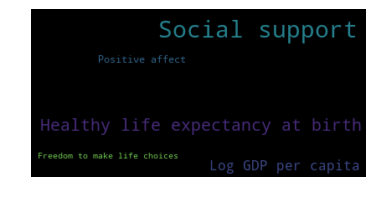

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

feature_importances_happy['Predictors'] = feature_importances_happy.index
feature_importances_happy = pd.DataFrame(feature_importances_happy)



d = {}
for x, a in feature_importances_happy.values:
    d[a] = x

wordcloud_happy = WordCloud()
wordcloud_happy.generate_from_frequencies(frequencies=d)
wordcloud_happy.min_font_size = 25
wordcloud_happy.background_colour = "black"
wordcloud_happy.colormap = "viridis"
wordcloud_happy.repeat = True
wordcloud_happy.relative_scaling = 0.5
plt.figure()
plt.imshow(wordcloud_happy, interpolation="bilinear")
plt.axis("off")
plt.show()



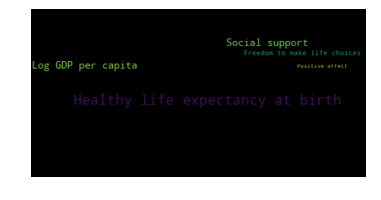

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

feature_importances_sad['Predictors'] = feature_importances_sad.index
feature_importances_sad = pd.DataFrame(feature_importances_sad)

d = {}
for x, a in feature_importances_sad.values:
    d[a] = x

wordcloud_sad = WordCloud()
wordcloud_sad.generate_from_frequencies(frequencies=d)
wordcloud_sad.min_font_size = 25
wordcloud_sad.background_colour = "black"
wordcloud_sad.colormap = "viridis"
wordcloud_sad.repeat = True
wordcloud_sad.relative_scaling = 0.5
plt.figure()
plt.imshow(wordcloud_sad, interpolation="bilinear")
plt.axis("off")
plt.show()

### <font color = green> 7. Forecasting the Predictor Importance in 2019 (Time Series Regression)

In [14]:
from sklearn.linear_model import LinearRegression

# Checking the multicollinearity between Predictor Variables with VIF
predictor_list = ["Log GDP per capita", "Social support", "Healthy life expectancy at birth",
                  "Freedom to make life choices", "Positive affect"]

for i in range(0,4) :
    for j in range(i+1, 5) :
        model = LinearRegression()
        X = report_sub[[predictor_list[i]]] 
        Y = report_sub[[predictor_list[j]]]
        model.fit(X, Y)
        score = model.score(X,Y)
        vif = round(1 / (1 - (score)**2), 2)
        print("Variance Inflation Factor (VIF) for {} and {} = {}".format(predictor_list[i], predictor_list[j], vif))
        


Variance Inflation Factor (VIF) for Log GDP per capita and Social support = 1.26
Variance Inflation Factor (VIF) for Log GDP per capita and Healthy life expectancy at birth = 2.04
Variance Inflation Factor (VIF) for Log GDP per capita and Freedom to make life choices = 1.02
Variance Inflation Factor (VIF) for Log GDP per capita and Positive affect = 1.01
Variance Inflation Factor (VIF) for Social support and Healthy life expectancy at birth = 1.17
Variance Inflation Factor (VIF) for Social support and Freedom to make life choices = 1.03
Variance Inflation Factor (VIF) for Social support and Positive affect = 1.05
Variance Inflation Factor (VIF) for Healthy life expectancy at birth and Freedom to make life choices = 1.02
Variance Inflation Factor (VIF) for Healthy life expectancy at birth and Positive affect = 1.01
Variance Inflation Factor (VIF) for Freedom to make life choices and Positive affect = 1.16


### <font color = orange> We know that there is no multicollinearity between the predictor variables after calculating the VIF for each of the 6 predictors when regressed against each other. We can safely use Linear Regression instead of Ridge/LASSO in our regression models below

In [15]:
from sklearn.linear_model import LinearRegression

importance_by_year = importance_by_year.transpose()

# Creating separate dataframes for 
freedom = pd.DataFrame(importance_by_year.loc["Freedom to make life choices"][0:14])
support = pd.DataFrame(importance_by_year.loc["Social support"][0:14])
pos_affect = pd.DataFrame(importance_by_year.loc["Positive affect"][0:14])
life_exp = pd.DataFrame(importance_by_year.loc["Healthy life expectancy at birth"][0:14])
gdp = pd.DataFrame(importance_by_year.loc["Log GDP per capita"][0:14])

# Using Linear Regression
year_df = pd.DataFrame([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
freedom_lin = LinearRegression()
freedom_lin = freedom_lin.fit(year_df, freedom)
support_lin = LinearRegression()
support_lin = support_lin.fit(year_df, support)
pos_affect_lin = LinearRegression()
pos_affect_lin = pos_affect_lin.fit(year_df, support)
gdp_lin = LinearRegression()
gdp_lin = support_lin.fit(year_df, gdp)
life_exp_lin = LinearRegression()
life_exp_lin = life_exp_lin.fit(year_df, life_exp)


# Setting up 2019 predictions of variable importance
freedom_pred = freedom_lin.predict(2019)
support_pred = support_lin.predict(2019)
pos_affect_pred = pos_affect_lin.predict(2019)
gdp_pred = gdp_lin.predict(2019)
life_exp_pred = life_exp_lin.predict(2019)


summary_list = [freedom_pred[0][0], support_pred[0][0], gdp_pred[0][0], pos_affect_pred[0][0], life_exp_pred[0][0]]
importance_by_year["Importance (2019) - Predicted"] = pd.DataFrame(summary_list)

for i in range(0,5):
    importance_by_year["Importance (2019) - Predicted"][i] = summary_list[i]

importance_by_year.drop(importance_by_year.index[6], inplace=True)


importance_by_year = importance_by_year.transpose()
year = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
importance_by_year['Year'] = 0
for i in range(15):
    importance_by_year['Year'][i] = year[i]


# Creating our line chart for visualisation 

# Setting the x and y axes, and graph title
layout2 = go.Layout(title="Changes in Predictor Importance over time <br> (Predicted for 2019)", 
                   xaxis={'title':'Year'},
                   yaxis={'title':'Variable Importance (out of 1)'})


# Create traces
trace0 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Freedom to make life choices"],
    mode = 'lines',
    name = 'Freedom',
    marker={'color': '#e1dee9'}
)
trace1 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Healthy life expectancy at birth"],
    mode = 'lines',
    name = 'Life Expectancy',
    marker={'color': 'red'}
)

trace2 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Log GDP per capita"],
    mode = 'lines',
    name = 'GDP per capita',
    marker={'color': 'lime'}
)
trace3 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Social support"],
    mode = 'lines',
    name = 'Social Support',
    marker={'color': '#e1dee9'}
)

trace4 = go.Scatter(
    x = importance_by_year['Year'],
    y = importance_by_year["Positive affect"],
    mode = 'lines',
    name = 'Positive Affect',
    marker={'color': '#e1dee9'}
)



data2 = [trace0, trace1, trace2, trace3, trace4]
figure2=go.Figure(data=data2,layout=layout2)
py.iplot(figure2, filename='Predictor Importance Changes over time')


### <font color = green>8A. Forecasting the Happiest Countries in 2019, and Singapore's Rank (Time Series Regression)

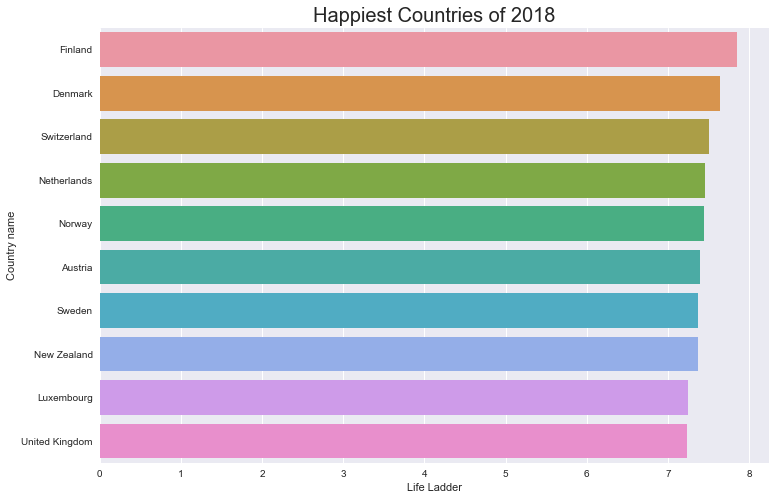

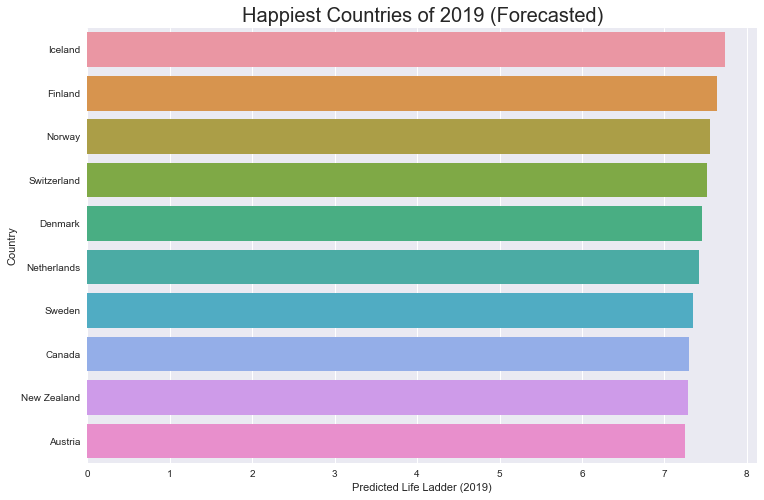

In [17]:
from sklearn.linear_model import LinearRegression

# Defining a function that fits a LinearRegression Model on that country's Life Ladder (2005-18),
# then returning a predicted happiness index for 2019
def get_life_ladder(country):
    model = LinearRegression()
    X_train_happiness = pd.DataFrame(report_sub[report_sub["Country name"] == country])
    X_train_happiness = pd.DataFrame([year for year in X_train_happiness["Year"]])
    y_train_happiness = pd.DataFrame(report_sub[report_sub["Country name"] == country])
    y_train_happiness = pd.DataFrame(y_train_happiness[["Life Ladder"]])
    model.fit(X_train_happiness, y_train_happiness)
    life_ladder_pred = model.predict(2019)
    #print("Predicted Life Ladder (2019) for {} = {}".format(country, life_ladder_pred[0][0]))
    return life_ladder_pred[0][0]


country_list = []
life_ladder_pred = []

for country in report_sub["Country name"] : 
    if country not in country_list :
        country_list.append(country)


for country in country_list :
    life_ladder_pred.append(get_life_ladder(country))


# Getting a list of the top 20 countries
summary_table = pd.DataFrame(country_list)
summary_table["Predicted Life Ladder (2019)"] = pd.DataFrame(life_ladder_pred)
summary_table.rename(columns = {0:"Country"}, inplace = True)
summary_table.set_index("Country", inplace = True)
summary_table = summary_table.sort_values(by=['Predicted Life Ladder (2019)'], ascending = False)
summary_table.head(n=10)

summary_table_sub = summary_table
summary_table_sub["Country"] = summary_table.index
#summary_table_sub
summary_table_sub["Country (2018)"] = report_sub["Country name"].astype(str)
summary_table_sub["Life Ladder (2018)"] = report_sub["Life Ladder"].astype(float)


year18_sub = year18
year18_sub = year18_sub.sort_values(by = "Life Ladder", ascending = False)
plt.figure(figsize=(12, 8))
plt.title("Happiest Countries of 2018", {'fontsize': 20})
sb.barplot(y ='Country name',x = 'Life Ladder', data = year18_sub.head(10), orient = "h")

plt.figure(figsize=(12, 8))
plt.title("Happiest Countries of 2019 (Forecasted)", {'fontsize': 20})
sb.barplot(y ='Country',x = 'Predicted Life Ladder (2019)', data = summary_table_sub.head(10), orient = "h")



### <font color = green> 8B. Tracking Singapore's Happiness (2005-19)

In [18]:
singapore = pd.DataFrame(report_sub[report_sub["Country name"]=="Singapore"])
singapore_life_ladder = singapore["Life Ladder"]
singapore_year = singapore[["Year"]]
model_sg_ll = LinearRegression()
model_sg_ll.fit(singapore_year, singapore_life_ladder)
sg_2019_pred = model_sg_ll.predict(2019)
singapore_life_ladder = list(singapore_life_ladder)
singapore_life_ladder.append(sg_2019_pred[0])
singapore_life_ladder = pd.DataFrame(singapore_life_ladder)

# Setting the x and y axes, and graph title
layout3 = go.Layout(title="Singapore's Life Ladder (2005-19)<br> Predicted for 2019", 
                   xaxis={'title':'Year'},
                   yaxis={'title':'Life Ladder (out of 10)'})


# Create traces
trace0 = go.Scatter(
    x = [2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    y = singapore_life_ladder,
    mode = 'lines',
    name = 'Freedom',
    marker={'color': 'orange'})
    
data3 = [trace0]
figure3=go.Figure(data=data3,layout=layout3)
py.iplot(figure3)

In [21]:
sizeref = 0.01
x = list(singapore['Year'])
y = list(singapore['Healthy life expectancy at birth'])
x.append('2019')
y.append(11.4)
trace0 = go.Scatter(
    x= x,
    y= y,
    mode='markers',
    name='2005',
    text=list(singapore['Life Ladder']),
    marker=dict(
        symbol='circle',
        color=['green', 'red', 'orange', 'purple', 'blue', 'pink', 'black', 'green', 'red', 'orange', 'purple', 'blue', 'pink', 'black'],
        sizemode='area',
        sizeref=sizeref,
        size=[5,6,4,3,7,8,9,10,11,12,13,13,14],
        line=dict(
            width=2
        ),
    )
)

layout = go.Layout(
    title="Singapore's Life Expectancy and Life Ladder Visualisation (2005-18)" ,
    xaxis=dict(
        title='Year',
        gridcolor='rgb(255, 255, 255)',
        range=[2005, 2020],
        #type='',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title=' Life Expectancy',
        gridcolor='rgb(255, 255, 255)',
        range=[72, 78],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

data = [trace0]  
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<h3 align="center"><font color=gold><font size = 20>Credits</h1> </font>

### PRIYA :
1.
2.
3.

### KELLY : 
1.
2.
3.

### TAN WEI LUN (U1822950L) :
1. Overall Life Ladder Visualisation (Interactive Choropleth Map)
2. Use of Random Forest Regression and Feature Importance Method on Yearly Datasets 
3. Use of Time Series Linear Regression to forecast Feature Importance Rankings and World Happiness Rankings in 2019